# Feature Selection

## Data Loading

In [1]:
# Basic
import os
import numpy as np
import pandas as pd

# Stats
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
PATH_DATA   = "../data/processed/merged/players_transfer_outcomes.csv"
RESULTS_CSV = "../results/feature_selection.csv"

# Load data
if not os.path.exists(PATH_DATA):
    raise FileNotFoundError(f"Missing required file: {PATH_DATA}")

df = pd.read_csv(PATH_DATA)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (4829, 50)


,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name,...,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur_player,highest_market_value_in_eur,Unnamed: 0,Name,Attribute Vector,Percentiles,Position
0,182581,2025-02-07,24/25,265,11282,Panathinaikos Athlitikos Omilos,Alanyaspor,0.0,2000000.0,Tonny Vilhena,...,https://www.transfermarkt.co.uk/tonny-vilhena/...,TR1,Alanyaspor,1500000.0,14000000.0,473.0,Tonny Vilhena,"[0.16, 0.1, 1.23, 0.04, 0.07, 0.16, 2.11, 34.3...","[81, 66, 67, 26, 39, 49, 40, 14, 18, 12, 42, 4...",Midfielder
1,339340,2025-02-04,24/25,985,383,Manchester United Football Club,Eindhovense Voetbalvereniging Philips Sport Ve...,0.0,15000000.0,Tyrell Malacia,...,https://www.transfermarkt.co.uk/tyrell-malacia...,NL1,Eindhovense Voetbalvereniging Philips Sport Ve...,12000000.0,22000000.0,175.0,Tyrell Malacia,"[0.0, 0.03, 0.44, 0.0, 0.06, 0.09, 1.97, 56.68...","[20, 33, 32, 11, 26, 26, 47, 66, 95, 62, 36, 4...",FullBack
2,124555,2025-02-03,24/25,430,416,Associazione Calcio Fiorentina,Torino Calcio,0.0,2000000.0,Cristiano Biraghi,...,https://www.transfermarkt.co.uk/cristiano-bira...,IT1,Torino Calcio,2000000.0,12000000.0,40.0,Cristiano Biraghi,"[0.07, 0.04, 0.85, 0.14, 0.19, 0.23, 4.66, 70....","[73, 47, 68, 78, 93, 84, 99, 91, 21, 89, 65, 8...",FullBack
3,126719,2025-02-03,24/25,1050,3709,Villarreal Club de Fútbol S.A.D.,Getafe Club de Fútbol S.A.D. Team Dubai,0.0,2500000.0,Juan Bernat,...,https://www.transfermarkt.co.uk/juan-bernat/pr...,ES1,Getafe Club de Fútbol S.A.D. Team Dubai,2500000.0,20000000.0,38.0,Juan Bernat,"[0.05, 0.04, 0.33, 0.19, 0.15, 0.19, 1.92, 58....","[60, 50, 19, 86, 78, 67, 45, 73, 99, 6, 12, 71...",FullBack
4,157506,2025-02-03,24/25,873,371,Crystal Palace Football Club,The Celtic Football Club,0.0,6000000.0,Jeffrey Schlupp,...,https://www.transfermarkt.co.uk/jeffrey-schlup...,SC1,The Celtic Football Club,5000000.0,12000000.0,404.0,Jeffrey Schlupp,"[0.11, 0.11, 1.0, 0.04, 0.05, 0.16, 1.56, 32.0...","[66, 74, 47, 22, 23, 50, 15, 8, 11, 18, 40, 71...",Midfielder


In [2]:
df.head()

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name,...,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur_player,highest_market_value_in_eur,Unnamed: 0,Name,Attribute Vector,Percentiles,Position
0,182581,2025-02-07,24/25,265,11282,Panathinaikos Athlitikos Omilos,Alanyaspor,0.0,2000000.0,Tonny Vilhena,...,https://www.transfermarkt.co.uk/tonny-vilhena/...,TR1,Alanyaspor,1500000.0,14000000.0,473.0,Tonny Vilhena,"[0.16, 0.1, 1.23, 0.04, 0.07, 0.16, 2.11, 34.3...","[81, 66, 67, 26, 39, 49, 40, 14, 18, 12, 42, 4...",Midfielder
1,339340,2025-02-04,24/25,985,383,Manchester United Football Club,Eindhovense Voetbalvereniging Philips Sport Ve...,0.0,15000000.0,Tyrell Malacia,...,https://www.transfermarkt.co.uk/tyrell-malacia...,NL1,Eindhovense Voetbalvereniging Philips Sport Ve...,12000000.0,22000000.0,175.0,Tyrell Malacia,"[0.0, 0.03, 0.44, 0.0, 0.06, 0.09, 1.97, 56.68...","[20, 33, 32, 11, 26, 26, 47, 66, 95, 62, 36, 4...",FullBack
2,124555,2025-02-03,24/25,430,416,Associazione Calcio Fiorentina,Torino Calcio,0.0,2000000.0,Cristiano Biraghi,...,https://www.transfermarkt.co.uk/cristiano-bira...,IT1,Torino Calcio,2000000.0,12000000.0,40.0,Cristiano Biraghi,"[0.07, 0.04, 0.85, 0.14, 0.19, 0.23, 4.66, 70....","[73, 47, 68, 78, 93, 84, 99, 91, 21, 89, 65, 8...",FullBack
3,126719,2025-02-03,24/25,1050,3709,Villarreal Club de Fútbol S.A.D.,Getafe Club de Fútbol S.A.D. Team Dubai,0.0,2500000.0,Juan Bernat,...,https://www.transfermarkt.co.uk/juan-bernat/pr...,ES1,Getafe Club de Fútbol S.A.D. Team Dubai,2500000.0,20000000.0,38.0,Juan Bernat,"[0.05, 0.04, 0.33, 0.19, 0.15, 0.19, 1.92, 58....","[60, 50, 19, 86, 78, 67, 45, 73, 99, 6, 12, 71...",FullBack
4,157506,2025-02-03,24/25,873,371,Crystal Palace Football Club,The Celtic Football Club,0.0,6000000.0,Jeffrey Schlupp,...,https://www.transfermarkt.co.uk/jeffrey-schlup...,SC1,The Celtic Football Club,5000000.0,12000000.0,404.0,Jeffrey Schlupp,"[0.11, 0.11, 1.0, 0.04, 0.05, 0.16, 1.56, 32.0...","[66, 74, 47, 22, 23, 50, 15, 8, 11, 18, 40, 71...",Midfielder


In [3]:
# Display
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 160)

In [4]:
df

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name,player_name_norm,PreMinutes,GA_pre,PostMinutes,GA_post,GA90_pre,GA90_post,PerfChange,DeclineFlag,from_league,to_league,from_league_name,to_league_name,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur_player,highest_market_value_in_eur,Unnamed: 0,Name,Attribute Vector,Percentiles,Position
0,182581,2025-02-07,24/25,265,11282,Panathinaikos Athlitikos Omilos,Alanyaspor,0.0,2000000.0,Tonny Vilhena,tonny vilhena,2935.0,3.0,540.0,3.0,0.091993,0.500000,0.408007,0.0,GR1,TR1,super-league-1,super-lig,Tonny,Vilhena,Tonny Vilhena,2024,11282,tonny-vilhena,Netherlands,Maassluis,Netherlands,1995-01-03 00:00:00,Central Midfield,Midfield,left,175.0,2025-06-30 00:00:00,Team of Future,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tonny-vilhena/...,TR1,Alanyaspor,1500000.0,14000000.0,473.0,Tonny Vilhena,"[0.16, 0.1, 1.23, 0.04, 0.07, 0.16, 2.11, 34.3...","[81, 66, 67, 26, 39, 49, 40, 14, 18, 12, 42, 4...",Midfielder
1,339340,2025-02-04,24/25,985,383,Manchester United Football Club,Eindhovense Voetbalvereniging Philips Sport Ve...,0.0,15000000.0,Tyrell Malacia,tyrell malacia,1276.0,0.0,639.0,0.0,0.000000,0.000000,0.000000,1.0,GB1,NL1,premier-league,eredivisie,Tyrell,Malacia,Tyrell Malacia,2024,383,tyrell-malacia,Netherlands,Rotterdam,Netherlands,1999-08-17 00:00:00,Left-Back,Defender,left,169.0,2025-06-30 00:00:00,Darren Dein,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tyrell-malacia...,NL1,Eindhovense Voetbalvereniging Philips Sport Ve...,12000000.0,22000000.0,175.0,Tyrell Malacia,"[0.0, 0.03, 0.44, 0.0, 0.06, 0.09, 1.97, 56.68...","[20, 33, 32, 11, 26, 26, 47, 66, 95, 62, 36, 4...",FullBack
2,124555,2025-02-03,24/25,430,416,Associazione Calcio Fiorentina,Torino Calcio,0.0,2000000.0,Cristiano Biraghi,cristiano biraghi,4680.0,15.0,560.0,0.0,0.288462,0.000000,-0.288462,1.0,IT1,IT1,serie-a,serie-a,Cristiano,Biraghi,Cristiano Biraghi,2024,416,cristiano-biraghi,Italy,Cernusco sul Naviglio,Italy,1992-09-01 00:00:00,Left-Back,Defender,left,185.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/cristiano-bira...,IT1,Torino Calcio,2000000.0,12000000.0,40.0,Cristiano Biraghi,"[0.07, 0.04, 0.85, 0.14, 0.19, 0.23, 4.66, 70....","[73, 47, 68, 78, 93, 84, 99, 91, 21, 89, 65, 8...",FullBack
3,126719,2025-02-03,24/25,1050,3709,Villarreal Club de Fútbol S.A.D.,Getafe Club de Fútbol S.A.D. Team Dubai,0.0,2500000.0,Juan Bernat,juan bernat,1308.0,4.0,500.0,1.0,0.275229,0.180000,-0.095229,1.0,ES1,ES1,laliga,laliga,Juan,Bernat,Juan Bernat,2024,3709,juan-bernat,Spain,Cullera,Spain,1993-03-01 00:00:00,Left-Back,Defender,left,170.0,2025-06-30 00:00:00,InterStarDeporte,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/juan-bernat/pr...,ES1,Getafe Club de Fútbol S.A.D. Team Dubai,2500000.0,20000000.0,38.0,Juan Bernat,"[0.05, 0.04, 0.33, 0.19, 0.15, 0.19, 1.92, 58....","[60, 50, 19, 86, 78, 67, 45, 73, 99, 6, 12, 71...",FullBack
4,157506,2025-02-03,24/25,873,371,Crystal Palace Football Club,The Celtic Football Club,0.0,6000000.0,Jeffrey Schlupp,jeffrey schlupp,2845.0,9.0,807.0,2.0,0.284710,0.223048,-0.061662,1.0,GB1,SC1,premier-league,scottish-premiership,Jeffrey,Schlupp,Jeffrey Schlupp,2024,371,jeffrey-schlupp,Germany,Hamburg,Ghana,1992-12-23 00:00:00,Left Midfield,Midfield,left,178.0,2025-05-31 00:00:00,Unique Sports Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jeffrey-schlup...,SC1,The Celtic Football Club,5000000.0,12000000.0,404.0,Jeffrey Schlupp,"[0.11, 0.11, 1.0, 0.04, 0.05, 0.16, 1.56

## Domain knowledge (primary filter)
- Do not include variables just because they exist.
- Keep features with a plausible, defensible connection to the target.
- This step combats the curse of dimensionality: too many irrelevant predictors leads to overfitting.

### Define Target & Features

In [5]:
# Target variable
TARGET = "DeclineFlag"

# Drop target + obvious leakage variables
leakage_cols = [
    TARGET,
    "PerfChange",        # directly encodes performance change
    "PreMinutes", "PostMinutes",   # before/after minutes
    "GA_pre", "GA_post",           # direct outcomes
    "GA90_pre", "GA90_post"        # per-90 stats (direct leakage)
]

# Drop ID-like and non-useful columns
id_like_cols = [
    "player_id", "from_club_id", "to_club_id", "current_club_id",
    "player_code", "Unnamed: 0"
]

# Drop text-heavy / URL / unstructured columns
text_cols = [
    "player_name", "player_name_norm", "from_club_name", "to_club_name",
    "from_league_name", "to_league_name",
    "first_name", "last_name", "name", "Name",  # duplicates / variations
    "agent_name", "image_url", "url", "current_club_name"
]

# Drop vector-like columns (already engineered, too high dimensional for now)
vector_cols = ["Attribute Vector", "Percentiles"]

# Combine all drops
drop_cols = leakage_cols + id_like_cols + text_cols + vector_cols

# Features / Target split
X = df.drop(columns=drop_cols, errors="ignore")
y = df[TARGET]

print("Initial shape:", X.shape)
X.head()

Initial shape: (4829, 20)


,transfer_date,transfer_season,transfer_fee,market_value_in_eur,from_league,to_league,last_season,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,current_club_domestic_competition_id,market_value_in_eur_player,highest_market_value_in_eur,Position
0,2025-02-07,24/25,0.0,2000000.0,GR1,TR1,2024,Netherlands,Maassluis,Netherlands,1995-01-03 00:00:00,Central Midfield,Midfield,left,175.0,2025-06-30 00:00:00,TR1,1500000.0,14000000.0,Midfielder
1,2025-02-04,24/25,0.0,15000000.0,GB1,NL1,2024,Netherlands,Rotterdam,Netherlands,1999-08-17 00:00:00,Left-Back,Defender,left,169.0,2025-06-30 00:00:00,NL1,12000000.0,22000000.0,FullBack
2,2025-02-03,24/25,0.0,2000000.0,IT1,IT1,2024,Italy,Cernusco sul Naviglio,Italy,1992-09-01 00:00:00,Left-Back,Defender,left,185.0,2025-06-30 00:00:00,IT1,2000000.0,12000000.0,FullBack
3,2025-02-03,24/25,0.0,2500000.0,ES1,ES1,2024,Spain,Cullera,Spain,1993-03-01 00:00:00,Left-Back,Defender,left,170.0,2025-06-30 00:00:00,ES1,2500000.0,20000000.0,FullBack
4,2025-02-03,24/25,0.0,6000000.0,GB1,SC1,2024,Germany,Hamburg,Ghana,1992-12-23 00:00:00,Left Midfield,Midfield,left,178.0,2025-05-31 00:00:00,SC1,5000000.0,12000000.0,Midfielder


## Variance Threshold (Low-Information Features)

In [6]:
# Variance threshold (remove near-constant columns)
selector = VarianceThreshold(threshold=0.01)  # tune threshold contextually
selector.fit(X.select_dtypes(include=[np.number]))

low_var_cols = X.select_dtypes(include=[np.number]).columns[~selector.get_support()]
print("Near-constant columns:", low_var_cols.tolist())

Near-constant columns: []


## Missingness & High-Missingness Drop

In [7]:
# Compute missingness %
missing_pct = X.isna().mean().sort_values(ascending=False)
high_missing_cols = missing_pct[missing_pct > 0.5].index.tolist()

print("High missingness columns (>50%):", high_missing_cols)

High missingness columns (>50%): []


## Correlation & Redundancy Check

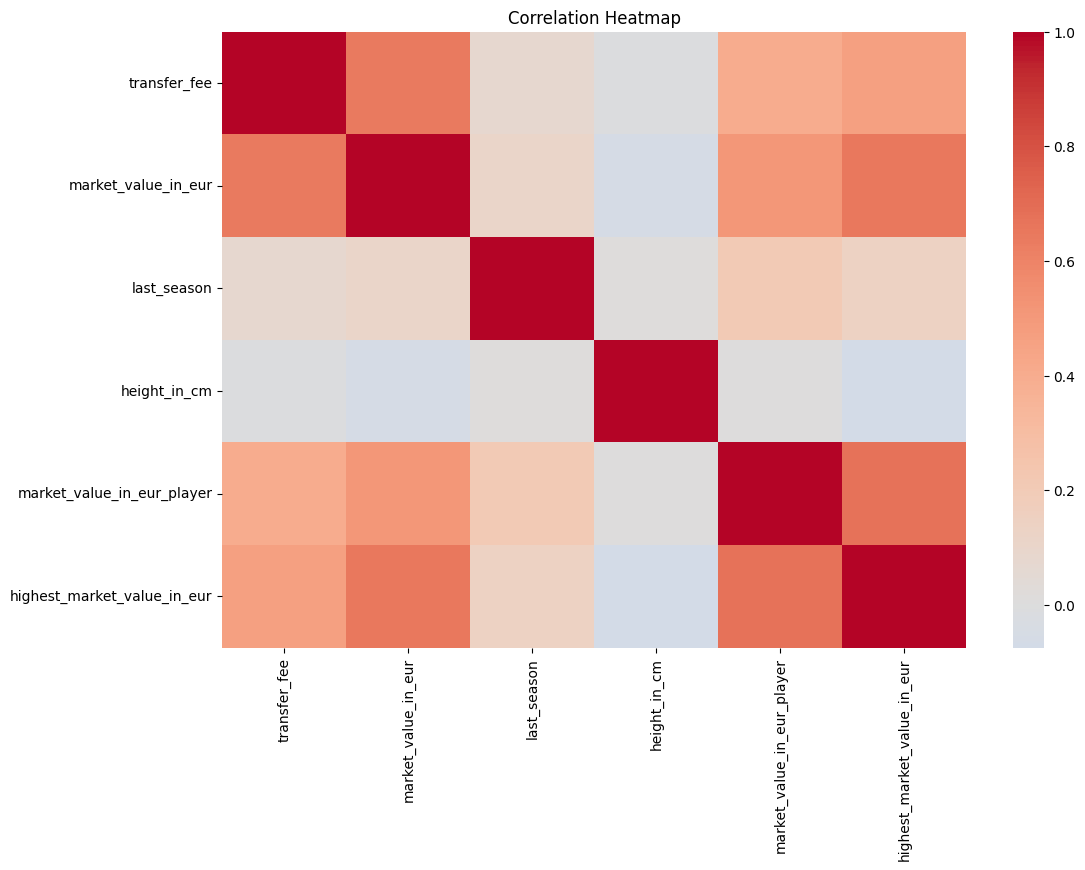

Highly correlated feature pairs (>|0.9|): []


In [8]:
# Numeric correlations
corr = X.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Flag highly correlated features
threshold = 0.9
corr_pairs = (
    corr.abs()
    .unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)
high_corr = [(i,j) for i,j in corr_pairs.index if i != j and corr.loc[i,j] > threshold]
print("Highly correlated feature pairs (>|0.9|):", high_corr)


## Variance Inflation Factor (VIF)

In [9]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(df, thresh=10.0):
    """
    Compute VIF for numeric features in df.
    Drops constant/all-NaN columns and replaces NaN/inf with safe values.
    Returns a DataFrame with features and their VIF.
    """
    # Keep only numeric
    X = df.select_dtypes(include=[np.number]).copy()
    
    # Drop columns with all NaN or zero variance
    X = X.dropna(axis=1, how='all')
    X = X.loc[:, X.std() > 0]
    
    # Replace NaN/inf with column mean
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.mean())
    
    # Compute VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])
    ]
    
    # Flag high VIF
    vif_data["high_vif"] = vif_data["VIF"] > thresh
    
    return vif_data.sort_values("VIF", ascending=False)


vif_results = compute_vif(X)  # X is your feature DataFrame (after dropping leakage cols)
print(vif_results.head(15))

                       feature         VIF  high_vif
2                  last_season  838.021907      True
3                 height_in_cm  831.339497      True
5  highest_market_value_in_eur    5.163172     False
1          market_value_in_eur    4.050265     False
4   market_value_in_eur_player    2.774823     False
0                 transfer_fee    2.046881     False


## Model-Based Feature Importance

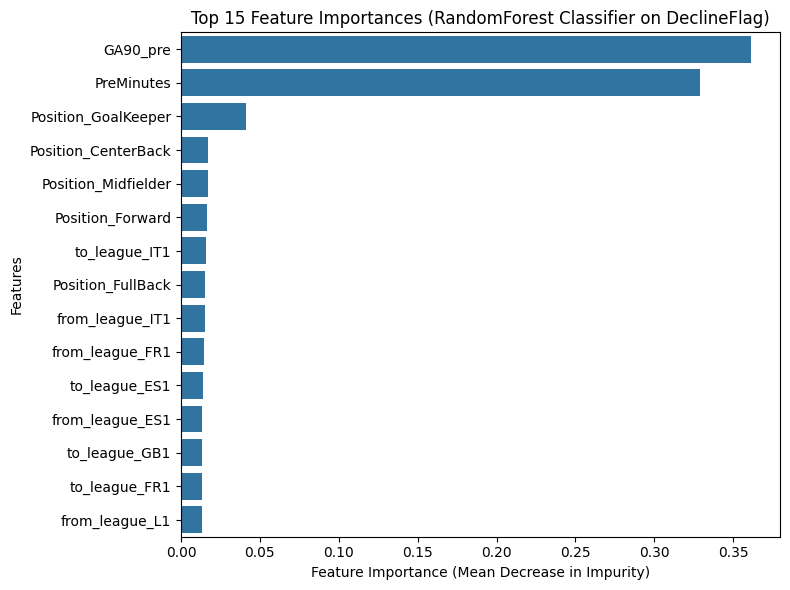

In [10]:
# Target variable (classification)
TARGET = "DeclineFlag"

# Select useful columns (features available in your dataset)
useful_cols = [
    "from_league", "to_league", "Position",
    "GA90_pre", "PreMinutes"
]

# Drop NaNs in target
mask = df[TARGET].notna()
X = df.loc[mask, useful_cols]
y = df.loc[mask, TARGET]

# Encode categoricals
cat_cols = ["from_league", "to_league", "Position"]
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True).fillna(0)

# RandomForestClassifier for classification task
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    n_jobs=-1,
    class_weight="balanced"   # handles imbalance if DeclineFlag is skewed
)
rf.fit(X_encoded, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

# Plot top 15
plt.figure(figsize=(8,6))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title("Top 15 Feature Importances (RandomForest Classifier on DeclineFlag)")
plt.xlabel("Feature Importance (Mean Decrease in Impurity)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [11]:
df.columns

Index(['player_id', 'transfer_date', 'transfer_season', 'from_club_id', 'to_club_id', 'from_club_name', 'to_club_name', 'transfer_fee', 'market_value_in_eur',
       'player_name', 'player_name_norm', 'PreMinutes', 'GA_pre', 'PostMinutes', 'GA_post', 'GA90_pre', 'GA90_post', 'PerfChange', 'DeclineFlag',
       'from_league', 'to_league', 'from_league_name', 'to_league_name', 'first_name', 'last_name', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'city_of_birth', 'country_of_citizenship', 'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm',
       'contract_expiration_date', 'agent_name', 'image_url', 'url', 'current_club_domestic_competition_id', 'current_club_name', 'market_value_in_eur_player',
       'highest_market_value_in_eur', 'Unnamed: 0', 'Name', 'Attribute Vector', 'Percentiles', 'Position'],
      dtype='object')

In [12]:
import os
import pandas as pd

# ============================
# Define final features (kept)
# ============================
kept_features = [
    # Contextual
    "from_league", "to_league", "Position", "sub_position", "position", "foot",
    
    # Pre-transfer performance
    "GA90_pre", "GA_pre", "PreMinutes",
    
    # Market/transfer info
    "transfer_fee", "market_value_in_eur", "market_value_in_eur_player", "highest_market_value_in_eur",
    
    # Player attributes
    "country_of_birth", "country_of_citizenship", "height_in_cm", 
    
    # Temporal sources (kept for engineered features like age, contract length)
    "transfer_date", "date_of_birth", "contract_expiration_date",
    
    # Target
    "DeclineFlag"
]


# ============================
# All features in dataset
# ============================
all_features = df.columns.tolist()

# ============================
# Reasons for dropping
# ============================
drop_reasons = {
    # Identifiers
    "player_id": "identifier",
    "from_club_id": "identifier (club ID)",
    "to_club_id": "identifier (club ID)",
    "current_club_id": "identifier (club ID)",
    "player_code": "identifier",
    "Unnamed: 0": "identifier",
    "player_name": "identifier",
    "player_name_norm": "identifier",
    "first_name": "identifier",
    "last_name": "identifier",
    "name": "identifier",
    "Name": "identifier",
    "from_club_name": "identifier",
    "to_club_name": "identifier",
    "from_league_name": "identifier",
    "to_league_name": "identifier",
    "current_club_name": "identifier",

    # URLs / agent
    "image_url": "url",
    "url": "url",
    "agent_name": "agent info (not predictive)",

    # Temporal identifiers (not used directly in modeling, but some may be kept for engineering)
    "transfer_season": "temporal identifier",
    "last_season": "temporal identifier (acts like ID)",
    "current_club_domestic_competition_id": "competition code identifier",

    # Leakage (post-outcome)
    "PostMinutes": "post-outcome leakage",
    "GA_post": "post-outcome leakage",
    "GA90_post": "post-outcome leakage",
    "PerfChange": "post-outcome leakage",

    # High-dimensional embeddings (require separate handling)
    "Attribute Vector": "vector embedding",
    "Percentiles": "vector embedding",
}

# ============================
# Build feature log
# ============================
records = []
for col in all_features:
    if col in kept_features:
        records.append({"feature": col, "status": "kept", "reason": "valid predictor/target"})
    else:
        reason = drop_reasons.get(col, "dropped (low information or irrelevant)")
        records.append({"feature": col, "status": "dropped", "reason": reason})

feature_log = pd.DataFrame(records)

# Save feature log
os.makedirs("../results", exist_ok=True)
feature_log.to_csv("../results/feature_selection.csv", index=False)
print("Feature selection log saved to ../results/feature_selection.csv")

# ============================
# Save refined dataset
# ============================
df_refined = df[kept_features].copy()

output_path = "../data/processed/merged_clean_refined.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df_refined.to_csv(output_path, index=False)

print(f"Refined dataset saved to {output_path}")
print("Shape:", df_refined.shape)

# Show first few rows of feature log
display(feature_log.head(15))


Feature selection log saved to ../results/feature_selection.csv
Refined dataset saved to ../data/processed/merged_clean_refined.csv
Shape: (4829, 20)


,feature,status,reason
0,player_id,dropped,identifier
1,transfer_date,kept,valid predictor/target
2,transfer_season,dropped,temporal identifier
3,from_club_id,dropped,identifier (club ID)
4,to_club_id,dropped,identifier (club ID)
5,from_club_name,dropped,identifier
6,to_club_name,dropped,identifier
7,transfer_fee,kept,valid predictor/target
8,market_value_in_eur,kept,valid predictor/target
9,player_name,dropped,identifier
